In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


### Importing Real Time Data

In [3]:
a = input("Enter the Stock Symbol(Add .NS for Indian stocks): ")
ticker = yf.Ticker(a.upper())
df = ticker.history(period="10y")
df

Enter the Stock Symbol(Add .NS for Indian stocks):  GOOG


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-20 00:00:00-05:00,25.388821,25.463346,25.141193,25.185114,44640224,0.0,0.0
2015-01-21 00:00:00-05:00,25.202503,25.800209,25.150334,25.738600,45374234,0.0,0.0
2015-01-22 00:00:00-05:00,25.909514,26.647330,25.821077,26.550941,53538588,0.0,0.0
2015-01-23 00:00:00-05:00,26.610563,26.937487,26.481879,26.827187,45634948,0.0,0.0
2015-01-26 00:00:00-05:00,26.756636,26.779988,26.316432,26.591682,30874534,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-13 00:00:00-05:00,191.350006,192.490005,188.660004,192.289993,13169100,0.0,0.0
2025-01-14 00:00:00-05:00,192.500000,193.270004,189.639999,191.050003,13651200,0.0,0.0
2025-01-15 00:00:00-05:00,194.350006,197.800003,193.330002,196.979996,12894900,0.0,0.0


### Visualizing the closing Price History

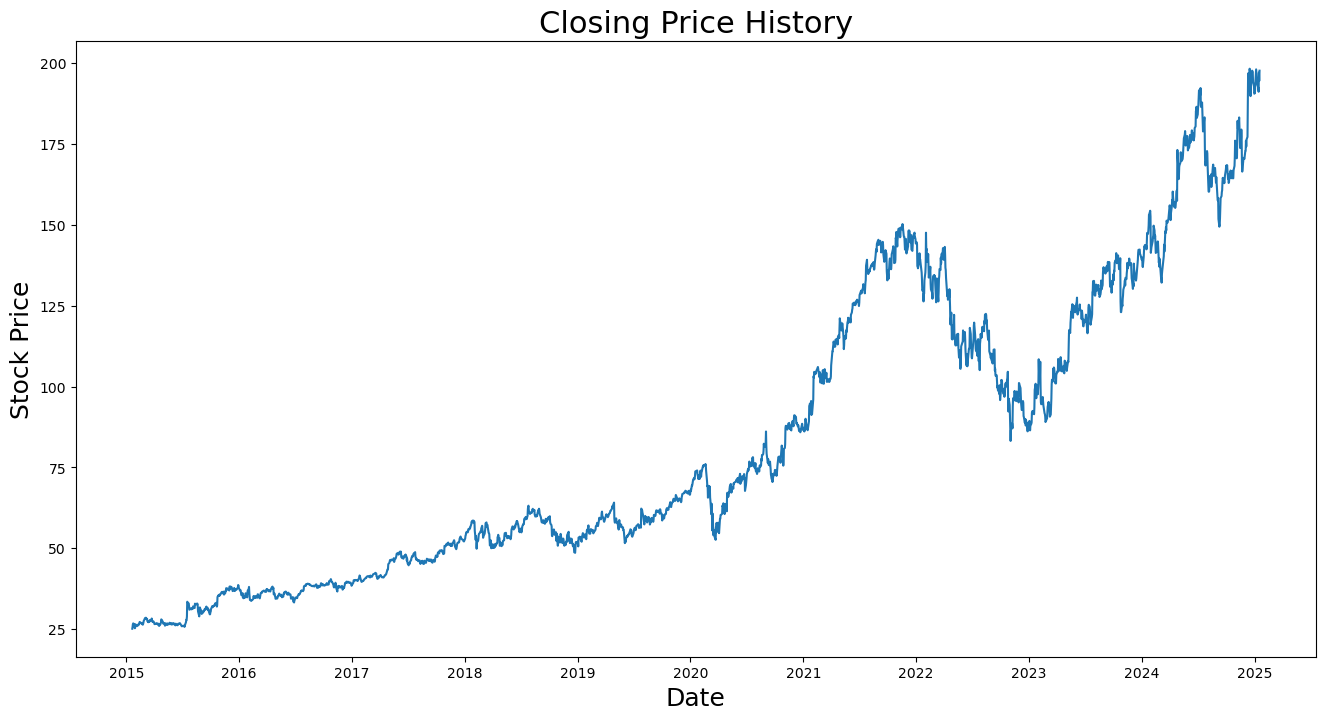

In [5]:
plt.figure(figsize=(16,8))
plt.title("Closing Price History",fontsize = 22)
plt.plot(df['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Stock Price",fontsize = 18)
plt.show()

In [6]:
df_close = df[['Close']]
df_close

,Close
Date,
2015-01-20 00:00:00-05:00,25.185114
2015-01-21 00:00:00-05:00,25.738600
2015-01-22 00:00:00-05:00,26.550941
2015-01-23 00:00:00-05:00,26.827187
2015-01-26 00:00:00-05:00,26.591682
...,...
2025-01-13 00:00:00-05:00,192.289993
2025-01-14 00:00:00-05:00,191.050003
2025-01-15 00:00:00-05:00,196.979996


In [7]:
df_close_array = df_close.values
training_data_len = round((len(df_close_array) * 0.8))

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_close_array)

In [23]:
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    

In [25]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [31]:
x_train.shape

(1953, 60, 1)

### Building the LSTM model

In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\91776\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the model

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1953/1953 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - loss: 0.0016


In [41]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = df_close_array[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [43]:
x_test = np.array(x_test)

In [45]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

### Getting the Predicted values

In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [55]:
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

4.76499768517021

C:\Users\91776\AppData\Local\Temp\ipykernel_6428\1323104634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


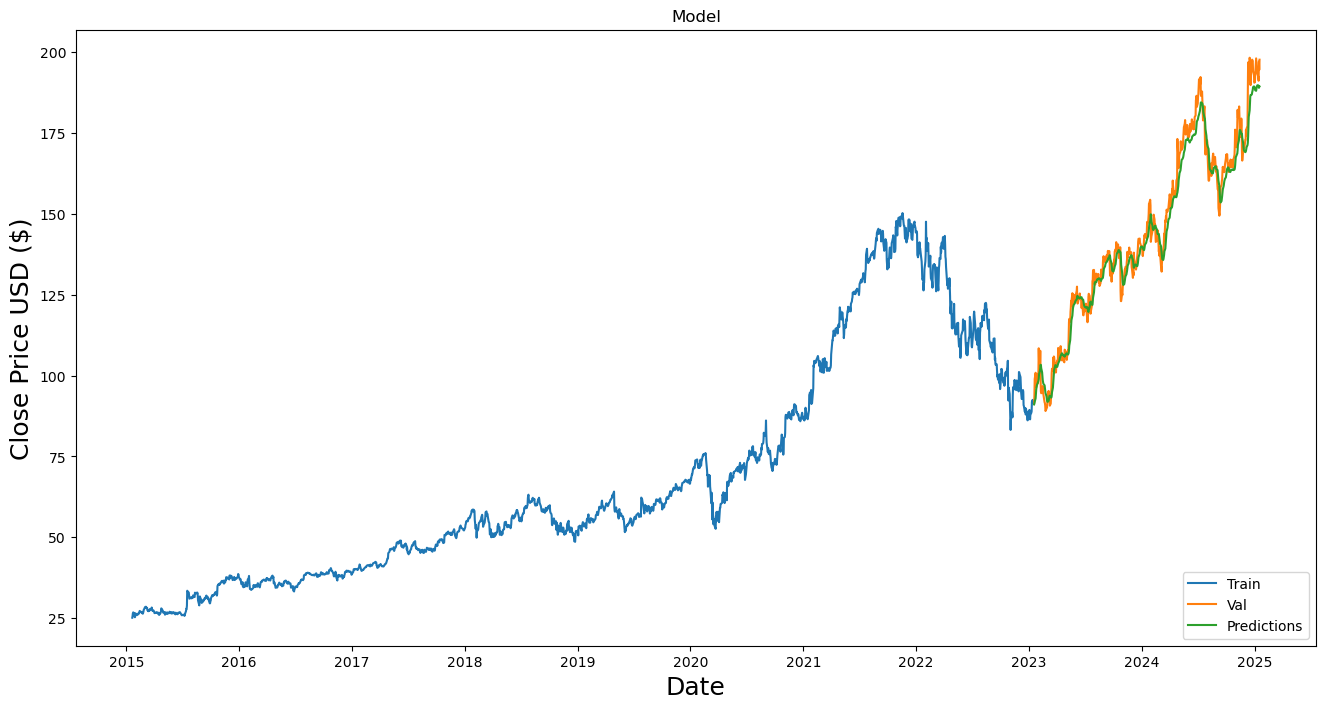

In [57]:
# Plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [59]:
valid

,Close,Predictions
Date,,
2023-01-18 00:00:00-05:00,91.451408,91.066277
2023-01-19 00:00:00-05:00,93.573784,91.383598
2023-01-20 00:00:00-05:00,98.924553,91.853165
2023-01-23 00:00:00-05:00,100.847641,92.991219
2023-01-24 00:00:00-05:00,98.854805,94.498848
...,...,...
2025-01-13 00:00:00-05:00,192.289993,189.619995
2025-01-14 00:00:00-05:00,191.050003,189.343384
2025-01-15 00:00:00-05:00,196.979996,188.851303


### Predicting next day Closing Price

In [74]:
new_df = df[['Close']]
last_60_days = new_df[-68:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 915ms/step


In [76]:
pred_price

array([[189.81647]], dtype=float32)